# Lorenzo Cassano lorenzo.cassano2@studio.unibo.it
## Importing Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import  ParameterGrid
from sklearn.model_selection import  GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 Load dataset

In [5]:
url = '/content/drive/MyDrive/exam/ML-Python-Lab-Data.csv'
sep = ','
# Index
names = ['Sex', 'Lenght','Diameter', 'Height', 'Whole_weight','Shucked weight','Viscera weight','Shell weight','Rings']
df = pd.read_csv(url, sep = sep, names = names)

### Preprocessing on sex
We need some preprocessing on attribute sex because the machine works with number and not with string values.
The attribute Sex is a nominal attribute.

In [6]:
def convert(x):
  if x == 'M':
    return 1
  elif x == 'F':
    return 2
  return 0

df["Sex"] = df["Sex"].apply(lambda x: convert(x))

### 1.1 showing size

In [7]:
df.shape

(4177, 9)

### 1.2 data description

In [8]:
df.describe()

,Sex,Lenght,Diameter,Height,Whole_weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,3997.000000,3976.000000,3987.000000,3990.000000,3983.000000,4002.000000,3990.000000,4177.000000
mean,0.991621,0.525330,0.408448,0.139669,0.830577,0.360681,0.180995,0.239796,0.861623
std,0.796410,0.119569,0.098728,0.041988,0.490629,0.221100,0.109425,0.139765,0.762510
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,0.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,1.000000,0.545000,0.425000,0.140000,0.802250,0.339000,0.171500,0.235000,1.000000
75%,2.000000,0.615000,0.480000,0.165000,1.154375,0.503250,0.253500,0.330000,1.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


### 1.3 boxplot and pairplot

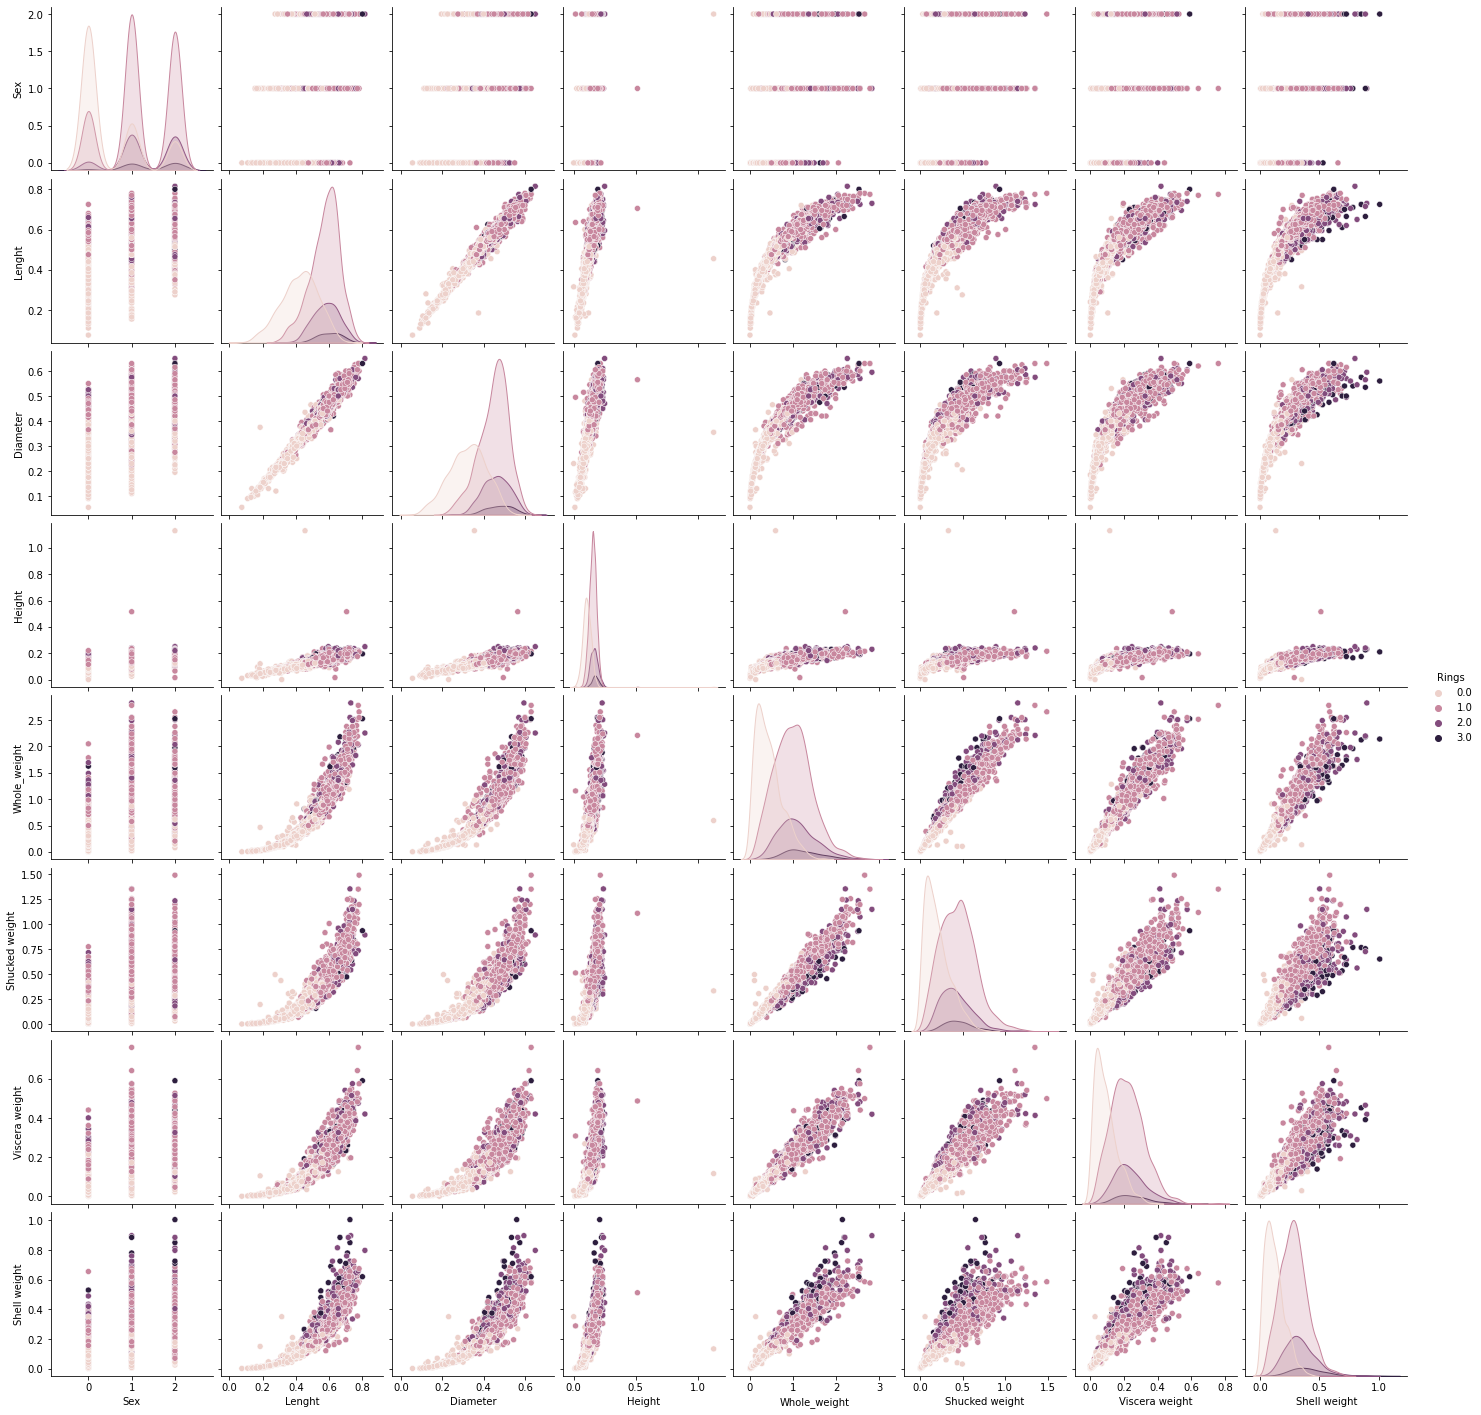

In [9]:
sns.pairplot(df,  hue = 'Rings')

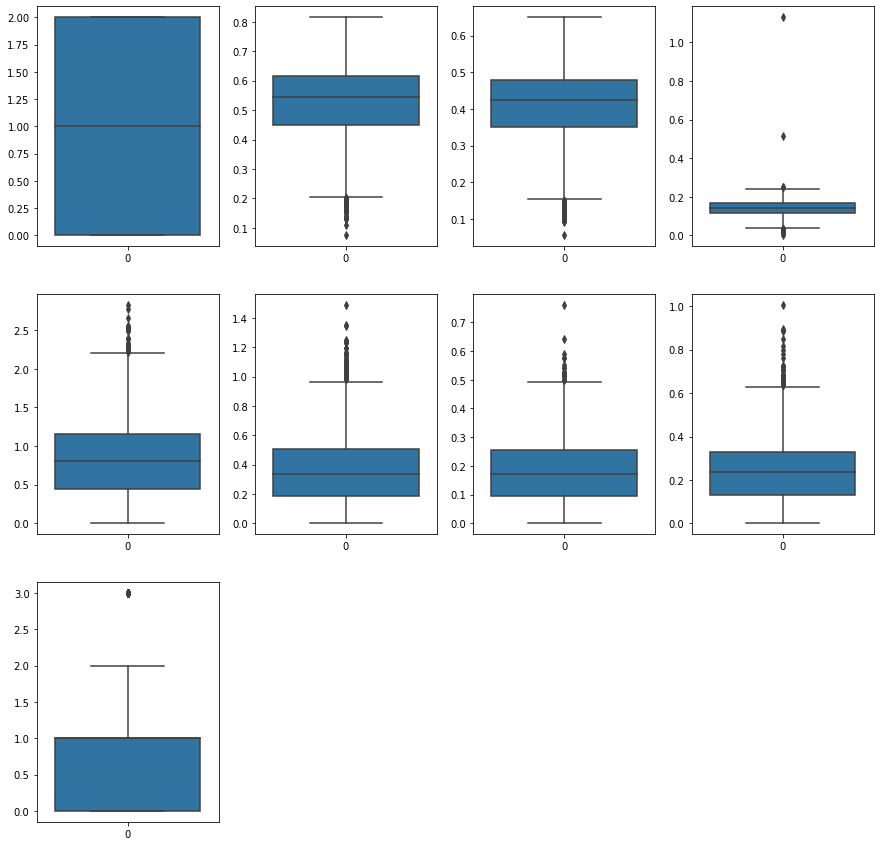

In [10]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(data=df[i])
    pos += 1

## 2 Comment about data exploration
with the first plot it is possible to observe that the attribute more or less have a distribution similar to Gaussian distribution.
Wiith boxplot it is possible observe that all the attributes(except Sex) have outliers.
It is possible notice that in whole weight there are some missing values.
There are some distributions that are equals.
See the next comment.

## 3. Drop the columns that are not relevant for the classification operation, if any, and explain why you do that.
From the plot it is possible to observe that Whole wheight, shucked weight,viscera weight and shell weight contain the "same" information, for this reason we can drop shucked weight,viscera weight and shell weight.
We can say the same things for length and diameter (they have the same distributions).
It is possible to noticed this reasoni observing the pairplot:Whole wheight, shucked weight,viscera weight and shell weight, have the same outliers; same thing for length and diameter.

In [11]:
to_drop = ["Shucked weight","Viscera weight","Shell weight", "Diameter"]
df1 = df.drop(to_drop, axis = 1)

We have same Nan values on whole weight we can decide to drop them

In [12]:
df2 = df1.dropna(axis=0)

## 4. find the best classification scheme considering two classification methods, find the best hyperparameters using cross validation; the optimization must be focused on the f1_macro measure

This function is useful to print the result

In [13]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print("Confusion matrix:\n")

    title = "Confusion matrix"

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        Xtest,
        y_true,
        cmap = plt.cm.Blues,
    )
    
    disp.ax_.set_title(title)

    plt.show()
    print()
    print()

### Split train and test

Splitting tha dataset train = 70 %, test set = 30 %

In [14]:
target = "Rings"
X = df2.drop(target, axis = 1)
y = df2[target]
     

In [15]:
ts = 0.3
random_state = 42
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = ts, random_state = random_state)

## Model 1

In [16]:
model_param = {'criterion':['gini', 'entropy'], 'max_depth':list(range(1,10)), 'min_samples_split': range(2,10)}
score = "f1_macro"
model_est = DecisionTreeClassifier(random_state=random_state)
model1 = GridSearchCV(estimator = model_est ,param_grid = model_param, scoring = score)
model1.fit(Xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': range(2, 10)},
             scoring='f1_macro')

## Model2

In [17]:
model_param = list(ParameterGrid({
    'n_estimators':[[20],[30],[40],[50]],
    'learning_rate':[[0.5],[0.75],[1],[1.25],[1.5]]}
))



model_est = AdaBoostClassifier(random_state=random_state)

model2 = GridSearchCV(model_est, model_param, scoring=score)

model2.fit(Xtrain, ytrain)

GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
             param_grid=[{'learning_rate': [0.5], 'n_estimators': [20]},
                         {'learning_rate': [0.5], 'n_estimators': [30]},
                         {'learning_rate': [0.5], 'n_estimators': [40]},
                         {'learning_rate': [0.5], 'n_estimators': [50]},
                         {'learning_rate': [0.75], 'n_estimators': [20]},
                         {'learning_rate': [0.75], 'n_estimators': [30]},
                         {'learning_ra...
                         {'learning_rate': [1.25], 'n_estimators': [20]},
                         {'learning_rate': [1.25], 'n_estimators': [30]},
                         {'learning_rate': [1.25], 'n_estimators': [40]},
                         {'learning_rate': [1.25], 'n_estimators': [50]},
                         {'learning_rate': [1.5], 'n_estimators': [20]},
                         {'learning_rate': [1.5], 'n_estimators': [30]},
                

## 5 Show the performance measures and the confusion matrices for the best hyperparameters of each model

## Showing performance and confusion matrix

### Showing result on the decision tree

Best parameters set found on train set:

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70       356
         1.0       0.61      0.80      0.69       526
         2.0       0.38      0.12      0.18       177
         3.0       0.25      0.03      0.05        35

    accuracy                           0.63      1094
   macro avg       0.49      0.41      0.41      1094
weighted avg       0.59      0.63      0.59      1094

Confusion matrix:



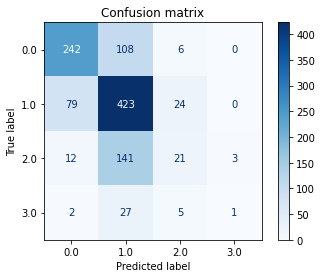

In [18]:
print_results(model1)

### Showing the result on the ADABoost

Best parameters set found on train set:

{'learning_rate': 0.75, 'n_estimators': 40}

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71       356
         1.0       0.59      0.84      0.69       526
         2.0       0.41      0.07      0.12       177
         3.0       0.00      0.00      0.00        35

    accuracy                           0.63      1094
   macro avg       0.44      0.40      0.38      1094
weighted avg       0.60      0.63      0.59      1094

Confusion matrix:



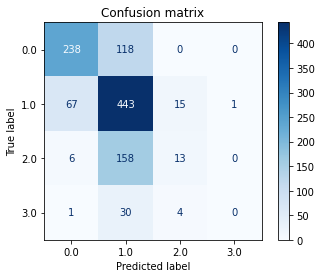

In [19]:
print_results(model2)

## Comment the result
In this case, with this 2 model, we noticed that the results are very similar, if we compare the classification report.
The second model has a higher precision but obviously the recall is smaller than the first model.
Observing the confusion matrix, the result of the class are more or less similar, howewer it is possible noticed that the second model it is not able to predict the class label = 3.